In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

# Set random seed.
np.random.seed(42)

In [3]:
# Read in the dataset
df = pd.read_csv('../datasets/cleaned_data.csv')

In [4]:
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,65.929134,43.448181,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,44.686107,10.799292,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,125.710352,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,104.332411,3415.717495,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,208.978600,1285.099111,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889


In [5]:
df.fillna(0, inplace=True)
df.isnull().sum()

Country Name                   0
Country Code                   0
rural_pop_percent_17           0
food_production_index_17       0
ag_land_area_17                0
arable_land_percent_2017       0
net_migration_2017             0
hiv_prevalence_2017            0
mat_mortality_ratio_2017       0
under5_mortality_ratio_2017    0
tubercul_incidence_2017        0
elec_access_2017               0
ren_energy_percent_2017        0
co2_emissions_2017             0
pop_air_pollution_2017         0
foreign_dir_inv_2017           0
atm_access_2017                0
adol_fertility_rate_2017       0
fem_labor_part_rate_2017       0
male_labor_part_rate_2017      0
fertility_rate_2017            0
dpt_immuniz_rate_2017          0
undernourished_rate_2017       0
cell_subscriptions_per100      0
internet_per_mil_2017          0
military_exp_2017              0
women_seats_percent_2017       0
male_bus_start_2017            0
female_bus_start_2017          0
patent_apps_2017               0
sci_articl

-----
### K-means Clustering 

In [6]:
X = df.drop(columns = ['Country Name', 'Country Code', 'HDI'])

In [7]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [8]:
# went with 4 as there are 4 cutoffs for development levels with HDI
km = KMeans(n_clusters = 4, random_state=42)
km.fit(X_ss)

KMeans(n_clusters=4, random_state=42)

In [9]:
km.labels_

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 0, 0, 3, 3, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 3, 0, 3, 3, 0, 0, 3, 1, 1, 1, 1,
       0, 0, 3, 3, 0, 3, 0, 1, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1,
       3, 3, 3, 0, 0, 0, 3, 0, 1, 0, 3, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 1, 0, 3, 1, 1, 3, 0, 0, 3, 0, 0, 3,
       0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 0, 0, 1, 0, 3, 3, 0, 3, 1, 0, 0, 1,
       3, 3, 0, 0, 0, 1, 0, 3, 1, 1, 0, 3, 0, 3, 3, 0, 0, 0, 1, 1, 0, 0,
       2, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1], dtype=int32)

In [10]:
df['cluster'] = km.labels_

In [11]:
df.groupby('cluster').mean()

,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,tubercul_incidence_2017,elec_access_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
cluster,,,,,,,,,,,,,,,,,,,,,
0,28.392265,102.824490,36.526875,15.010785,1.432858e+05,0.377551,24.748724,9.563265,32.571429,28.392265,...,126.422658,10941.465646,1.902594,23.040274,13.435000,13.557449,6137.729592,13562.853699,334.653262,0.834041
1,62.294229,105.103429,48.055768,17.450271,-6.393191e+04,4.642857,530.314286,77.594286,241.000000,62.294229,...,71.191974,18.353598,1.467440,20.339349,22.383429,22.526286,26.771429,343.789143,102.731178,0.502886
2,29.991000,102.410000,50.221359,14.961180,1.516016e+06,0.400000,24.000000,7.900000,32.550000,29.991000,...,113.241628,15272.841359,2.529918,21.801222,15.250000,15.250000,769806.500000,452827.500000,91.843360,0.840000
3,54.218620,104.782500,36.807201,11.879650,-2.719223e+05,1.484615,148.163462,33.832692,176.206923,53.488096,...,93.880993,508.260187,1.666070,19.196538,35.727019,35.823173,413.951923,3465.661538,142.906057,0.645962


In [12]:
km.inertia_

3820.9033826880104

In [13]:
silhouette_score(X_ss, km.labels_)

0.14985160961779542

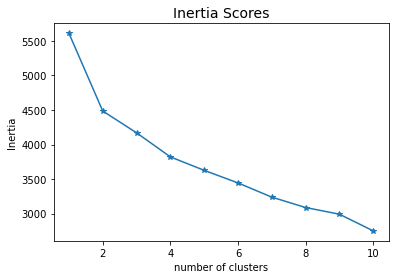

In [37]:
# the below code was adapted from lesson 7.01 on k-means clustering
inertia_list = []

for k in range(1,11):
    km = KMeans(n_clusters= k, random_state=42)
    km.fit(X_ss)
    inertia_list.append(km.inertia_)

plt.plot(range(1,11), inertia_list, marker = '*');
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia Scores', fontsize = 14);

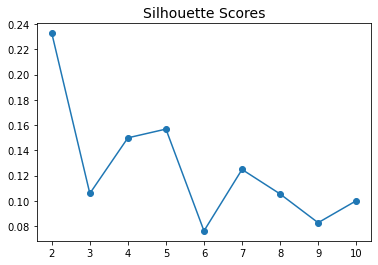

In [36]:
silhouette_list = []

for k in range(2,11):
    km = KMeans(n_clusters = k, random_state= 42)
    km.fit(X_ss)
    silhouette_list.append(silhouette_score(X_ss, km.labels_))

plt.plot(range(2,11), silhouette_list, marker='o')

plt.title('Silhouette Scores', fontsize = 14);

In [16]:
# doesn't perform very well - try DBScan
# will try to use one to feed 
# into regression or classification model

In [17]:
# went with 2 as this appears optimal based on plots above
km = KMeans(n_clusters = 2, random_state=42)
km.fit(X_ss)

KMeans(n_clusters=2, random_state=42)

In [18]:
print(km.inertia_)
silhouette_score(X_ss, km.labels_)

4484.843461534039


0.23270137140436237

In [19]:
df['cluster'] = km.labels_

In [20]:
df['cluster'].value_counts()

0    123
1     64
Name: cluster, dtype: int64

In [21]:
cluster_0 = df.loc[df['cluster'] == 0]

cluster_1 = df.loc[df['cluster'] == 1]

-----
### DBSCAN

In [22]:
dbscan = DBSCAN()
dbscan.fit(X_ss)

DBSCAN()

In [23]:
# no clusters and all outliers. adjust parameters
pd.Series(dbscan.labels_).unique()

array([-1])

In [24]:
dbscan = DBSCAN(eps = 2)
dbscan.fit(X_ss)

pd.Series(dbscan.labels_).unique()

array([-1])

In [25]:
dbscan = DBSCAN(eps = 2.5, min_samples = 4)
dbscan.fit(X_ss)

pd.Series(dbscan.labels_).unique()

array([-1,  0,  1,  2])

In [26]:
print(f'Kmeans silhouette score: {silhouette_score(X_ss, km.labels_)}')
print('*'*20)
print(f'DBSCAN silhouette: {silhouette_score(X_ss, dbscan.labels_)}')

Kmeans silhouette score: 0.23270137140436237
********************
DBSCAN silhouette: -0.19446253565315505


In [27]:
# DBSCAN did not perform well (even after adjusting parameters)
# Kmeans performs better in this case

## KMeans output clusters for supervised model

In [28]:
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI,cluster
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,43.448181,0.945227,27.710843,8.0,9.0,23.5,91.89,55.595550,0.509,1
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,10.799292,2.507985,30.454545,36.0,36.0,23.5,55.50,23.916555,0.582,1
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792,0
3,Andorra,AND,11.850,102.830002,40.042553,1.744681,-4999.0,0.4,13.5,3.0,...,3415.717495,1.430273,32.142857,13.0,13.0,23.5,2.01,163.823404,0.867,0
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,1285.099111,1.430273,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889,0


In [29]:
df['cluster'].value_counts()

0    123
1     64
Name: cluster, dtype: int64

In [30]:
df['cluster'].value_counts(normalize = True)

0    0.657754
1    0.342246
Name: cluster, dtype: float64

In [31]:
X = df.drop(columns=['Country Name', 'Country Code', 'HDI'])
y = df['HDI']

In [32]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [33]:
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
lr.score(X_train, y_train)

0.950488392446978

In [35]:
lr.score(X_test, y_test)

0.8466035619773518